 ## 1. Top 10 Run Scorer

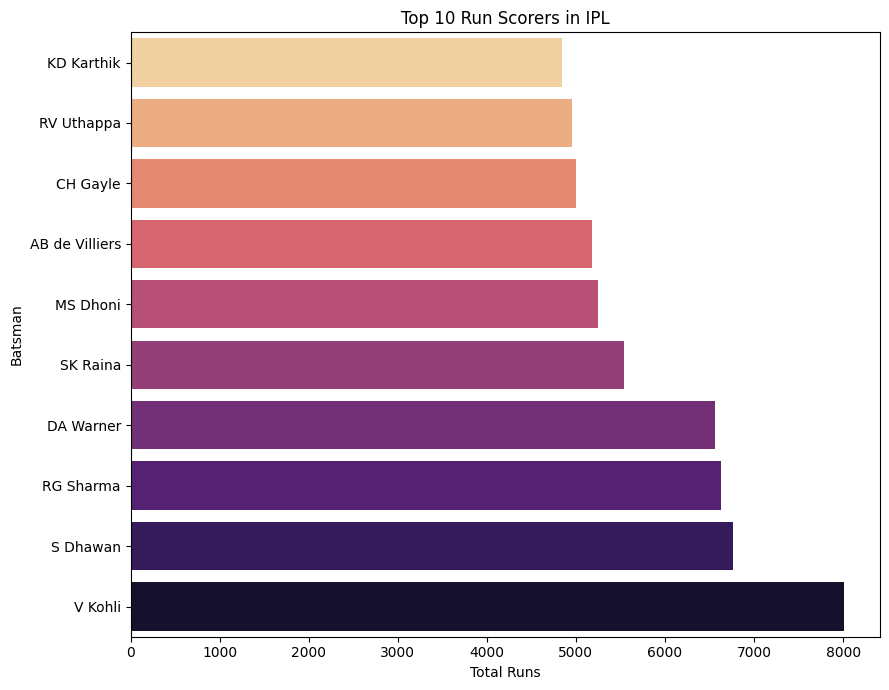

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets (make sure the relative paths are correct in your local setup)
matches = pd.read_csv('../Task 1/matches.csv')
deliveries = pd.read_csv('../Task 1/deliveries.csv')

# Calculate top 10 run scorers
top10 = deliveries.groupby('batter')['batsman_runs'].sum().reset_index()
top10 = top10.sort_values(by='batsman_runs', ascending=False).head(10)

# Plot
plt.figure(figsize=(9, 7))
sns.barplot(data=top10, x='batsman_runs', y='batter', hue='batter', palette='magma', legend=False)
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.gca().invert_yaxis()  # Show highest scorer on top
plt.tight_layout()
plt.show()


## 2. Top 10 six Hitters in IPL

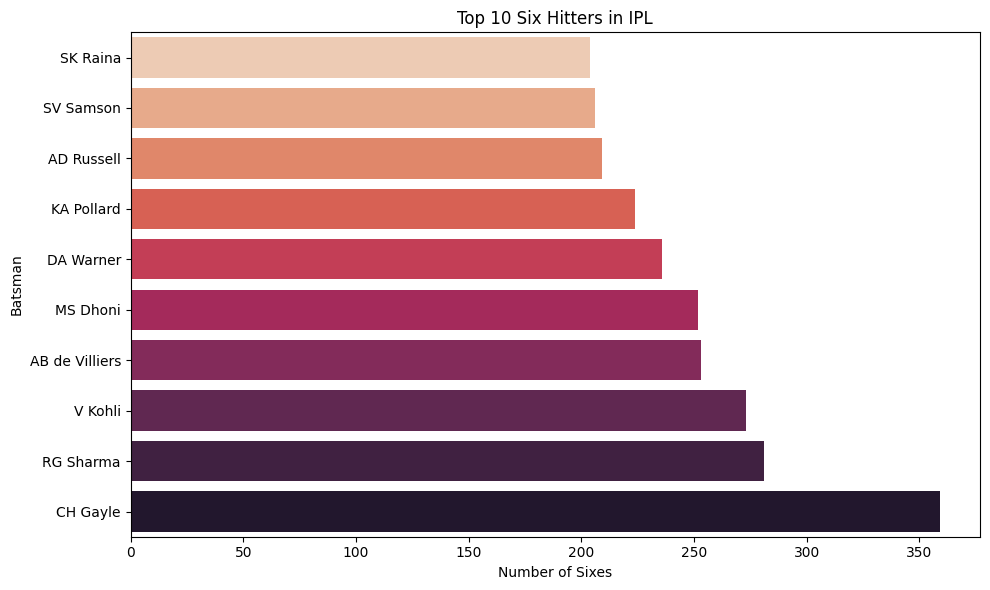

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (check relative path)
deliveries = pd.read_csv('../Task 1/deliveries.csv')

# Filter sixes
sixes = deliveries[deliveries['batsman_runs'] == 6]

# Count top 10 six hitters
sixes_count = sixes['batter'].value_counts().reset_index().head(10)
sixes_count.columns = ['Batsman', 'Sixes']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sixes_count, x='Sixes', y='Batsman', hue='Batsman', palette='rocket', legend=False)
plt.title("Top 10 Six Hitters in IPL")
plt.xlabel("Number of Sixes")
plt.ylabel("Batsman")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



## 3. Toss Decision Proportions

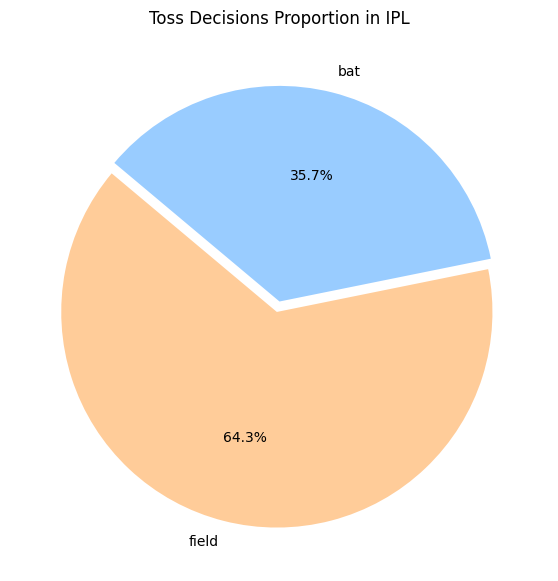

In [24]:
toss_decisions = matches['toss_decision'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', startangle=140, 
        colors=['#ffcc99', '#99ccff'], explode=[0.05, 0])
plt.title("Toss Decisions Proportion in IPL")
plt.show()


## 4. Distribution of Runs per Ball by Different Teams

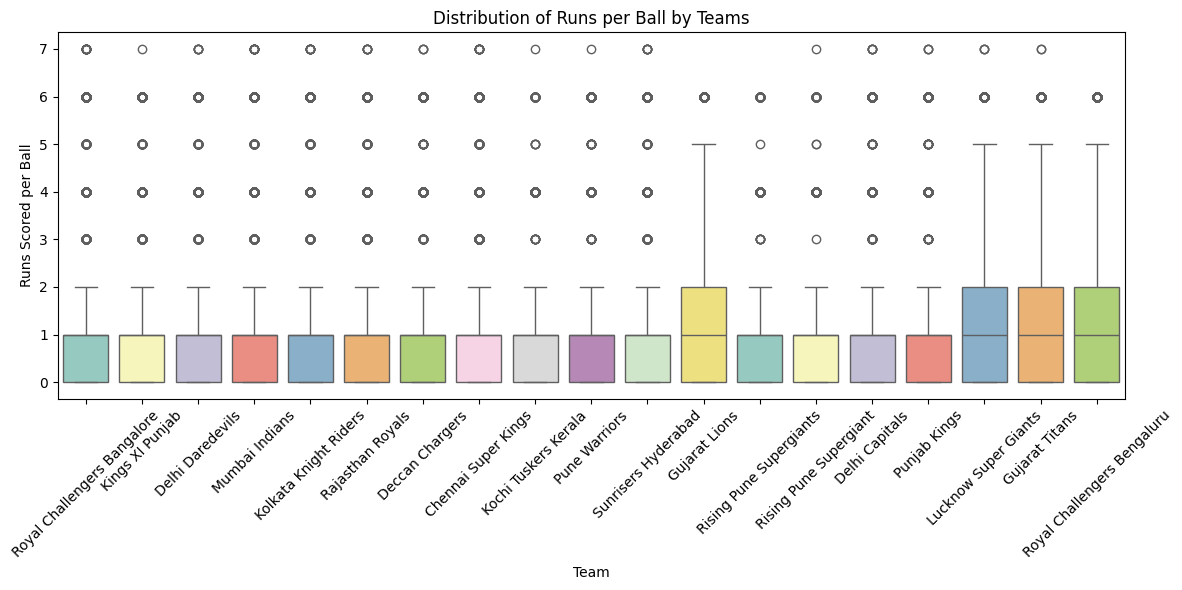

In [8]:
plt.figure(figsize=(12,6))

merged_df = deliveries.merge(matches[['id', 'team1']], left_on='match_id', right_on='id').drop(columns=['id'])

sns.boxplot(data=merged_df, x='team1', y='total_runs', hue='team1', palette='Set3', legend=False)
plt.title("Distribution of Runs per Ball by Teams")
plt.xlabel("Team")
plt.ylabel("Runs Scored per Ball")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 5. Most Matches Won By  Teams

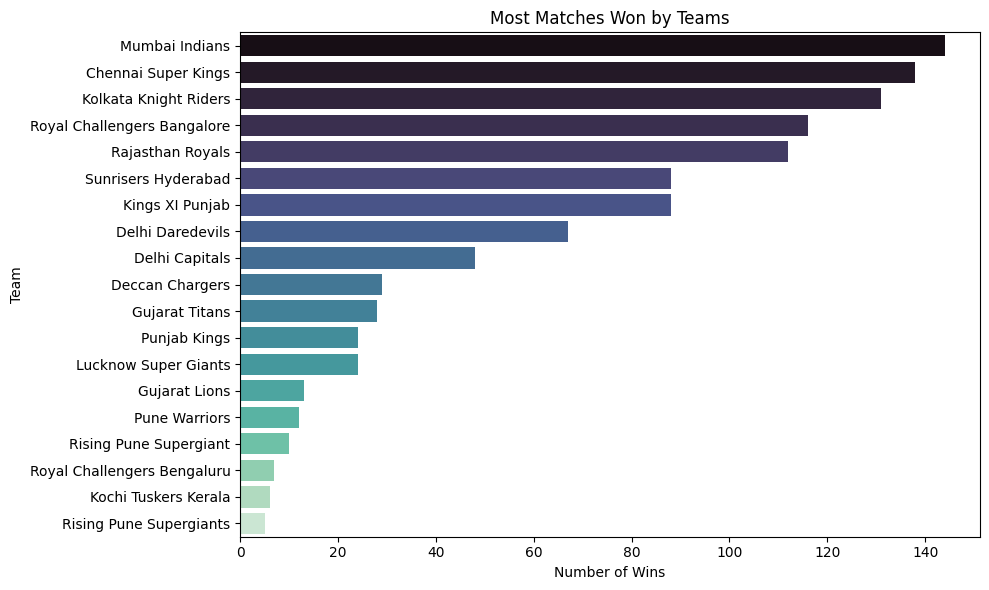

In [ ]:
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']
plt.figure(figsize=(10,6))
sns.barplot(data=team_wins, x='Wins', y='Team', hue='Team', palette='mako', legend=False)
plt.title("Most Matches Won by Teams")
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


## 6. Top Runs Score Per Season

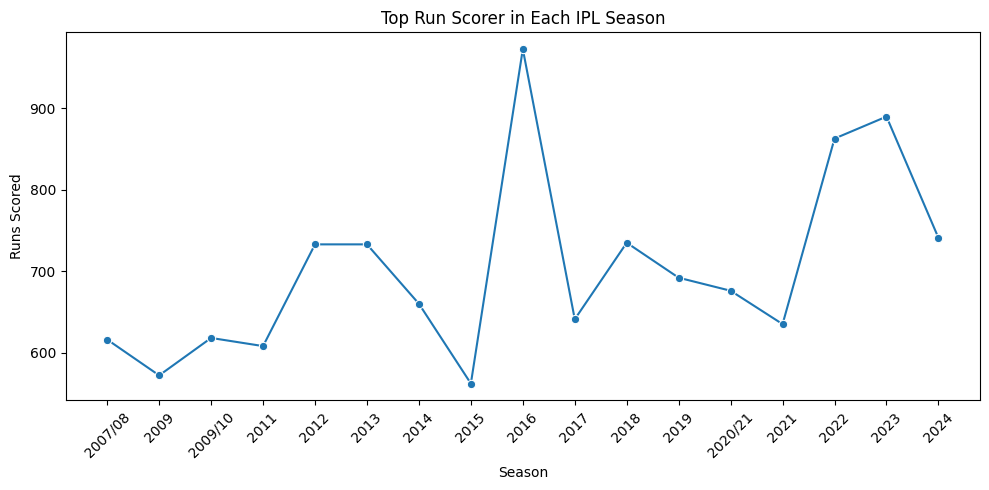

In [15]:
# Merge to get season info
merged = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

# Get total runs by batter per season
season_runs = merged.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

# Top scorer per season
top_scorers = season_runs.sort_values(['season', 'batsman_runs'], ascending=[True, False]).drop_duplicates('season')

# Plot line graph
plt.figure(figsize=(10,5))
sns.lineplot(data=top_scorers, x='season', y='batsman_runs', marker='o')
plt.title("Top Run Scorer in Each IPL Season")
plt.xlabel("Season")
plt.ylabel("Runs Scored")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 7. Matches Played By Each Team Per Season

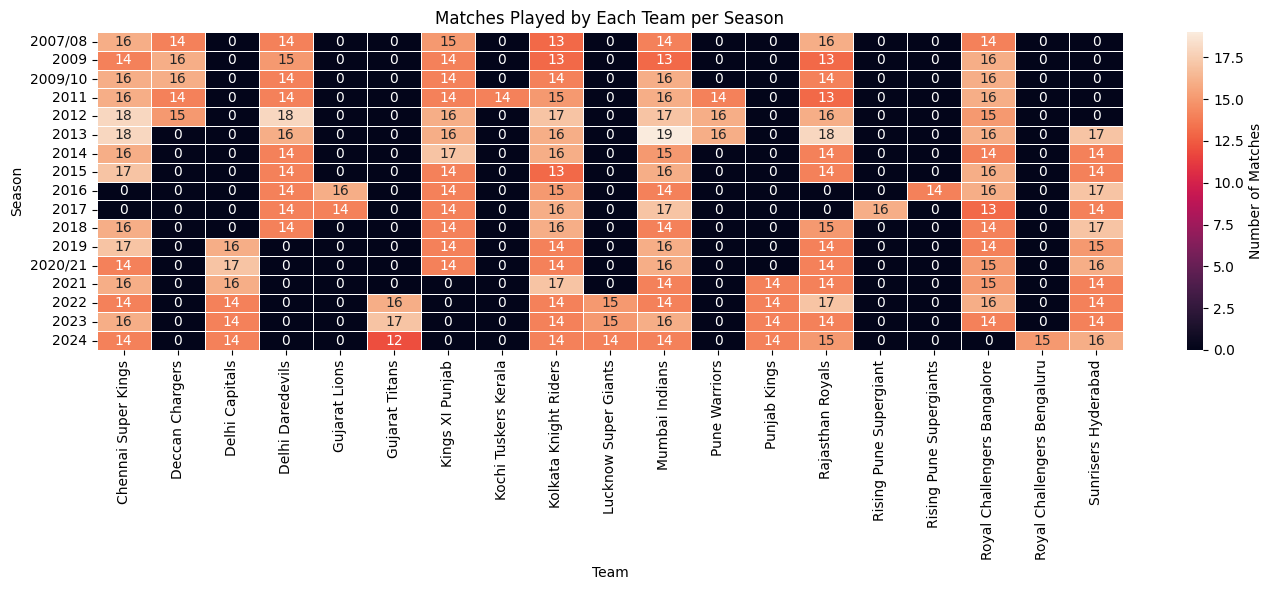

In [17]:
team_season = matches.melt(id_vars=['season'], value_vars=['team1', 'team2'], var_name='Team_Type', value_name='Team')
team_season_count = team_season.groupby(['season', 'Team']).size().unstack().fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(team_season_count, annot=True, cmap='rocket', linewidths=0.5, cbar_kws={'label': 'Number of Matches'})
plt.title("Matches Played by Each Team per Season")
plt.xlabel("Team")
plt.ylabel("Season")
plt.tight_layout()
plt.show()


## 8. Matches Won by Each Team per Season

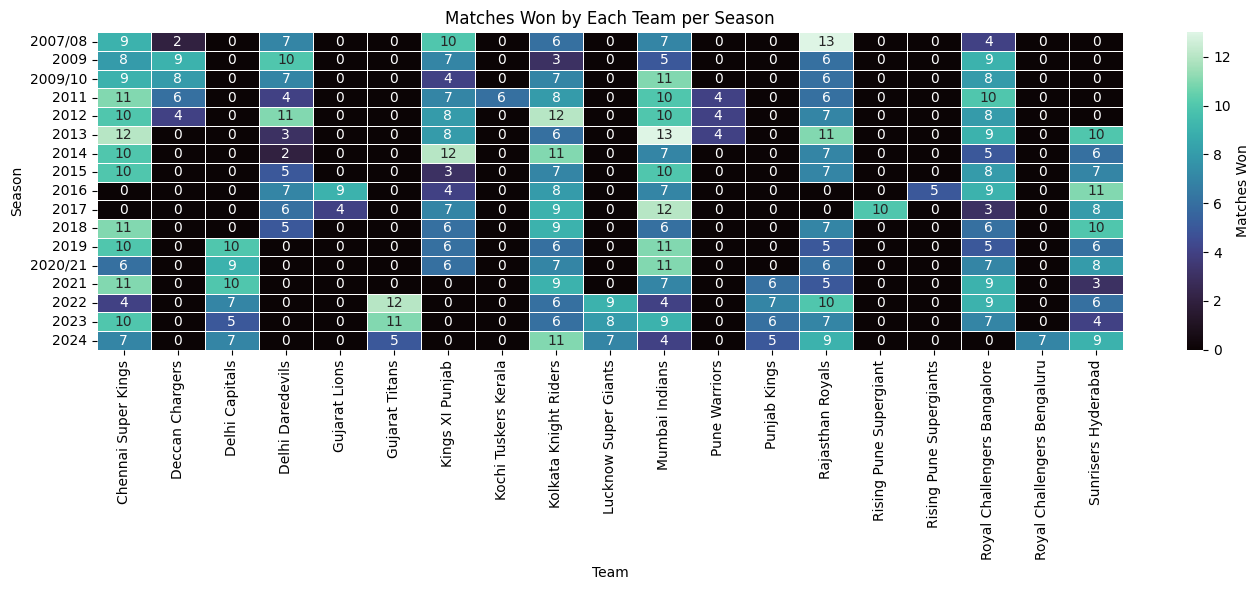

In [19]:
# Count matches won per team per season
wins_per_season = matches.groupby(['season', 'winner']).size().unstack().fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(wins_per_season, annot=True, cmap='mako', linewidths=0.5, cbar_kws={'label': 'Matches Won'})
plt.title("Matches Won by Each Team per Season")
plt.xlabel("Team")
plt.ylabel("Season")
plt.tight_layout()
plt.show()

## 9. Top 10 Batsmen with Most Sixes Overall

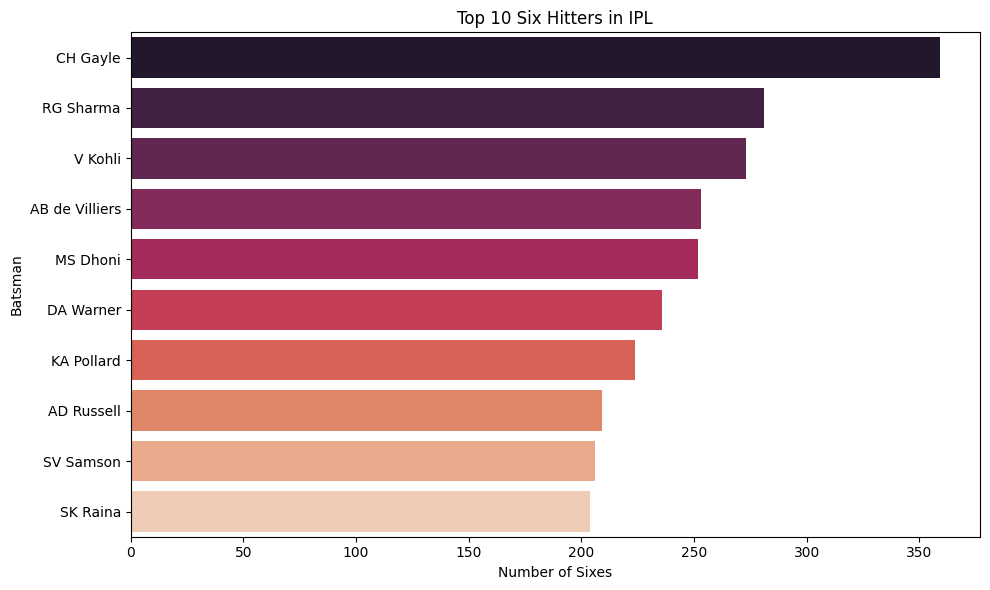

In [10]:
# Filter sixes and count per batter
sixes = deliveries[deliveries['batsman_runs'] == 6]
sixes_count = sixes['batter'].value_counts().head(10).reset_index()
sixes_count.columns = ['Batsman', 'Sixes']

plt.figure(figsize=(10,6))
sns.barplot(data=sixes_count, x='Sixes', y='Batsman', hue='Batsman', palette='rocket', legend=False)
plt.title("Top 10 Six Hitters in IPL")
plt.xlabel("Number of Sixes")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


## 10. Total Runs Scored by Each Season

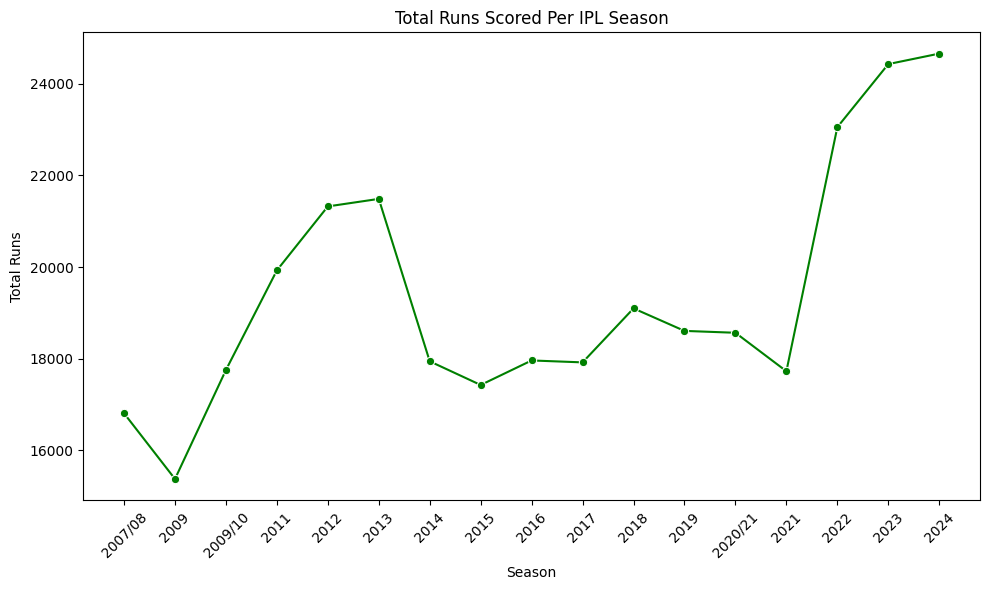

In [22]:
# Merge deliveries with season info
merged = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

# Calculate total runs per season
season_runs = merged.groupby('season')['batsman_runs'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=season_runs, x='season', y='batsman_runs', marker='o', color='green')
plt.title("Total Runs Scored Per IPL Season")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()